<a href="https://colab.research.google.com/github/rinazbelhaj/EVA/blob/master/Project%204/Assignment%204%20-%20Third.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Third attempt on MNIST

## Main objective :
Achieve 99.4% accuracy on MNIST data with less than 15K parameters

## Previous Observations :

1. The model was still able to learning even after we reduced the number of parameters.But we were only able to reach 98.84% validation accuracy in 10 epochs..

2. The model is also not overfitting. This means adding the drop out worked.

3. Using 1x1 convolutions and lesser number of filters, we were able to satisfy the constrain of less than 15 K parameters.

4. The Model was learning slowly as compared to previous model. We will have to fix this in the next iteration.

## Changes in this iteration :

1. Increase batch size from 32 to 128 to speed up the training process.

2. Add Batch Normalization to reduce the time to reach 99+ accuracy.

3. Add more drop out layers to further reduce overfitting.

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


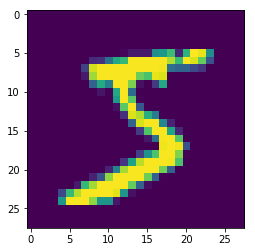

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation,BatchNormalization
model = Sequential()

 
model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(28,28,1), name='conv_1')) # 26
model.add(BatchNormalization(name='bn_1'))
model.add(Conv2D(10, (3, 3), activation='relu', name='conv_2')) # 24
model.add(BatchNormalization(name='bn_2'))
model.add(Conv2D(10, (3, 3), activation='relu', name='conv_3')) # 22
model.add(BatchNormalization(name='bn_3'))
model.add(Dropout(0.10,name='dropout_1'))

model.add(MaxPooling2D(pool_size=(2, 2), name='pool_1')) # 11

model.add(Conv2D(10, (3, 3), activation='relu', name='conv_4')) # 9
model.add(BatchNormalization(name='bn_4'))
model.add(Conv2D(10, (3, 3), activation='relu', name='conv_5')) # 7
model.add(BatchNormalization(name='bn_5'))
model.add(Dropout(0.10,name='dropout_2'))
model.add(Conv2D(32, (3, 3), activation='relu', name='conv_6')) # 5
model.add(BatchNormalization(name='bn_6'))
model.add(Dropout(0.10,name='dropout_3'))

model.add(Conv2D(10, (1, 1), activation='relu', name='conv_6a')) # 5
model.add(BatchNormalization(name='bn_7'))
model.add(Conv2D(10, (3, 3), activation='relu', name='conv_7')) #3
model.add(BatchNormalization(name='bn_8'))
model.add(Conv2D(10, (3, 3), name='conv_8')) # 1
model.add(Flatten(name='flatten'))
model.add(Activation('softmax', name='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
bn_1 (BatchNormalization)    (None, 26, 26, 10)        40        
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 10)        910       
_________________________________________________________________
bn_2 (BatchNormalization)    (None, 24, 24, 10)        40        
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 10)        910       
_________________________________________________________________
bn_3 (BatchNormalization)    (None, 22, 22, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 10)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, epochs=25, validation_data=(X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 15s 246us/step - loss: 0.5169 - acc: 0.8422 - val_loss: 0.1182 - val_acc: 0.9640
Epoch 2/25
60000/60000 [==============================] - 8s 126us/step - loss: 0.1118 - acc: 0.9663 - val_loss: 0.0680 - val_acc: 0.9792
Epoch 3/25
60000/60000 [==============================] - 8s 139us/step - loss: 0.0755 - acc: 0.9768 - val_loss: 0.0472 - val_acc: 0.9844
Epoch 4/25
60000/60000 [==============================] - 8s 133us/step - loss: 0.0586 - acc: 0.9820 - val_loss: 0.0398 - val_acc: 0.9874
Epoch 5/25
60000/60000 [==============================] - 8s 126us/step - loss: 0.0506 - acc: 0.9842 - val_loss: 0.0448 - val_acc: 0.9867
Epoch 6/25
60000/60000 [==============================] - 8s 126us/step - loss: 0.0451 - acc: 0.9858 - val_loss: 0.0359 - val_acc: 0.9893
Epoch 7/25
60000/60000 [==============================] - 8s 127us/step - loss: 0.0404 - acc: 0.9872 - val_loss: 0.0344 -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.024569476239520736, 0.9923]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[6.6594050e-09 3.3755675e-06 4.0688352e-08 1.2600939e-06 3.9170473e-07
  1.7067021e-07 4.2859404e-11 9.9999475e-01 2.4306807e-10 2.2987143e-08]
 [1.1662556e-05 5.4561669e-06 9.9998271e-01 2.2362601e-09 3.0390797e-08
  1.3180082e-10 4.8028507e-08 6.4650103e-09 1.1446828e-08 6.4859007e-11]
 [1.4202333e-09 9.9999368e-01 3.8174370e-09 2.2807992e-10 2.1793176e-06
  2.4408553e-06 7.7916752e-08 1.4659224e-06 6.2169542e-10 1.3034098e-07]
 [9.9999881e-01 4.6914868e-09 4.0271892e-08 2.9210059e-07 4.5869579e-11
  2.4128596e-07 4.5913529e-07 5.5305829e-08 3.5330623e-09 6.5074779e-08]
 [2.9582576e-12 1.1954687e-10 4.2211026e-11 2.2529157e-12 9.9999273e-01
  1.9796139e-11 1.6173540e-11 3.0113240e-10 4.1698252e-11 7.2192183e-06]
 [2.6083369e-09 9.9999058e-01 1.8656747e-08 1.5671237e-11 3.6417180e-06
  1.6114649e-07 5.2278054e-08 5.4426609e-06 8.3394180e-10 1.4314647e-07]
 [2.3709801e-11 4.7041976e-06 1.1591448e-09 7.6435889e-09 9.9961782e-01
  9.6514873e-07 2.0861613e-08 6.8235187e-07 9.3703438e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Number of Filters :  10


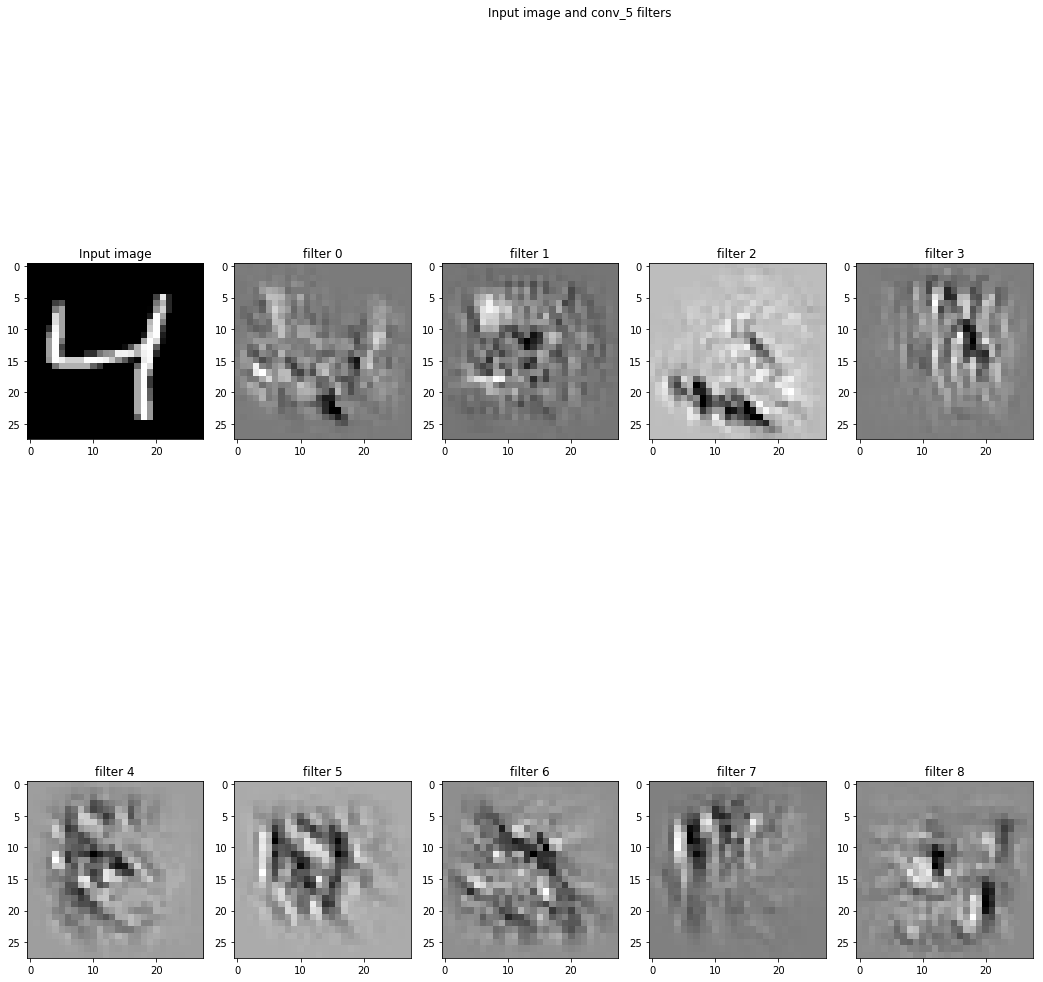

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    print("Number of Filters : ",layer_output.shape[3])
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 8
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    elif layer_output.shape[3] >= 5:
        plot_x, plot_y = 2, 5
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (16, 16))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.0, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

# Observations :

1. The model is now training faster with increased batch size. Taking 8s per epoch instead of 13s per epoch for batch size 128 v/s 32

2. The model now is able to learning faster with batch normalization. We were able to reach 98.95% validation accuracy in 10 epochs.

3. The model overfitting is further reduced with two additional dropout layers. 

4. This model is learning faster and better as compared to the previous model. We were able to reach a validation accuracy of 99.32% in 24 epochs.

5. The validation accuracy looks highly volatile. This is because of the high learning rate towards the global minima. We have to fix this by introducing diminishing learning rate.


The model has improved a lot from the plain vanilla model but we are yet to reached the objective of 99.4% accuracy. We will try for that in the next iteration.